In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

from matplotlib.ticker import AutoMinorLocator
import matplotlib.patches as patches

In [21]:
modelname = 'mild-salad-468'
modelname = 'morning-bush-469'
# modelname = 'dutiful-gorge-467'
modelname = 'robust-tree-339'
fpath = f'/raid/javier/Datasets/CaloVAE/data/synData/dataset2_synthetic_{modelname}.hdf5' #/fast_scratch/QVAE/data/atlas_dataset2and3_uniform/dataset_2_synthetic.hdf5" #"/fast_scratch/QVAE/syn_data/dataset2_synthetic_nohits.hdf5" #"/fast_scratch/QVAE/syn_data/dataset2_synthetic.hdf5"
in_data=h5py.File(fpath,'r')

atlas_fpath = "/raid/javier/Datasets/CaloVAE/data/atlas_dataset2and3/dataset_2_2.hdf5"  #"/fast_scratch/QVAE/data/atlas_dataset2and3_uniform/dataset_2_1.hdf5"  
atlas_=h5py.File(atlas_fpath,'r')

# test_fpath = "/fast_scratch/QVAE/test_data/dataset_2_2.hdf5"
# test_data=h5py.File(atlas_fpath,'r')

In [22]:
atlas_energies = np.array(atlas_["incident_energies"])/1000
data_energies = np.array(in_data['incidence energy'])/1000 #loaded['energy']/1000 

In [23]:
atlas_data = np.array(atlas_["showers"]) #[((low_cutoff < atlas_energies) & (atlas_energies < high_cutoff)).squeeze()]
data = np.array(in_data['showers'])

In [27]:
in_data.keys()

<KeysViewHDF5 ['incidence energy', 'showers']>

In [28]:
data = (data).mean(axis=0)
atlas_data = (atlas_data).mean(axis=0)

data = np.reshape(data, (45,16,9))
atlas_data = np.reshape(atlas_data, (45,16,9))

In [29]:
r_avg_data = data.sum(axis=0).sum(axis=0) /1000
r_avg_atlas_data = atlas_data.sum(axis=0).sum(axis=0) /1000

theta_avg_data = data.sum(axis=0).sum(axis=1) /1000
theta_avg_atlas_data = atlas_data.sum(axis=0).sum(axis=1) /1000

layer_avg_data = data.sum(axis=1).sum(axis=1) /1000
layer_avg_atlas_data = atlas_data.sum(axis=1).sum(axis=1) /1000

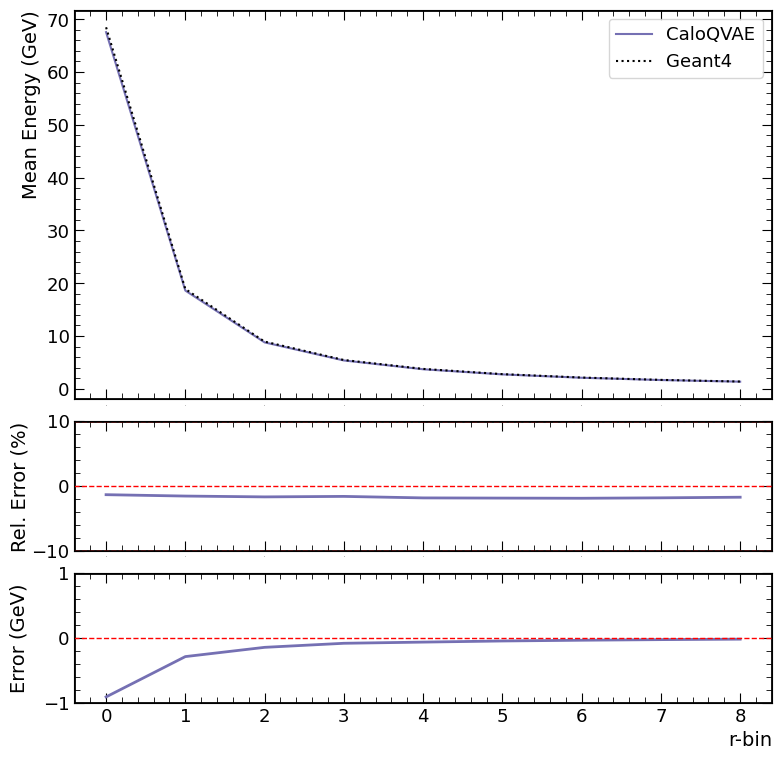

In [38]:
fig = plt.figure(figsize=(9, 9))
gs = gridspec.GridSpec(3, 1, height_ratios=[3,1,1]) 
gs.update(wspace=0.025, hspace=0.1)

ax0 = plt.subplot(gs[0])
plt.xticks(fontsize=0)
ax1 = plt.subplot(gs[1],sharex=ax0)
plt.xticks(fontsize=0)
ax2 = plt.subplot(gs[2],sharex=ax0)

plot_label = 'CaloQVAE'
atlas_label = 'Geant4'

ax0.plot(r_avg_data,label=plot_label,linestyle='-',color='#7570b3')
ax0.plot(r_avg_atlas_data,label=atlas_label,linestyle='dotted',color='black')

ratio = 100*np.divide(r_avg_data-r_avg_atlas_data,r_avg_atlas_data)
ax1.plot(ratio,color='#7570b3',linewidth=2,linestyle='-')
ax2.plot(r_avg_data-r_avg_atlas_data,color='#7570b3',linewidth=2,linestyle='-')

ax0.set_xlabel("",fontsize=20)
ax0.set_ylabel("Mean Energy (GeV)", fontsize=14, loc="top")

ax0.xaxis.set_minor_locator(AutoMinorLocator())
ax0.yaxis.set_minor_locator(AutoMinorLocator())

ax0.tick_params(which='both', direction="in")
ax0.tick_params(which='major', length=7, direction="in")
ax0.tick_params(which='minor', length=4, direction="in")

ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
ax0.tick_params(axis="x",direction="in")
ax0.tick_params(axis="y",direction="in")

# Get the axis limits
x_min, x_max = ax0.get_xlim()
y_min, y_max = ax0.get_ylim()

# Create a rectangle patch for the outer line
outer_rectangle = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='black', facecolor='none')
ax0.add_patch(outer_rectangle)

ax0.legend(loc='best',fontsize=13,ncol=1)

ax1.set_ylabel('Rel. Error (%)', fontsize=14, labelpad=1)
plt.xlabel("r-bin", fontsize=14, loc='right')
ax1.axhline(y=0.0, color='r', linestyle='--',linewidth=1)
ax1.axhline(y=10, color='r', linestyle='--',linewidth=1)
ax1.axhline(y=-10, color='r', linestyle='--',linewidth=1)
ax1.set_ylim([-10,10])
plt.rc("font", size=13)

ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())

ax1.tick_params(which='both', direction="in")
ax1.tick_params(which='major', length=7, direction="in")
ax1.tick_params(which='minor', length=4, direction="in")

ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.tick_params(axis="x",direction="in")
ax1.tick_params(axis="y",direction="in")

# Get the axis limits
x_min, x_max = ax1.get_xlim()
y_min, y_max = ax1.get_ylim()

# Create a rectangle patch for the outer line
outer_rectangle = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='black', facecolor='none')
ax1.add_patch(outer_rectangle)

# Axis 2

ax2.set_ylabel('Error (GeV)', fontsize=14, labelpad=10)
ax2.axhline(y=0.0, color='r', linestyle='--',linewidth=1)
ax2.set_ylim([-1,1])

ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())

ax2.tick_params(which='both', direction="in")
ax2.tick_params(which='major', length=7, direction="in")
ax2.tick_params(which='minor', length=4, direction="in")

ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
ax2.tick_params(axis="x",direction="in")
ax2.tick_params(axis="y",direction="in")

# Get the axis limits
x_min, x_max = ax2.get_xlim()
y_min, y_max = ax2.get_ylim()

# Create a rectangle patch for the outer line
outer_rectangle = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='black', facecolor='none')
ax2.add_patch(outer_rectangle)

plt.savefig(f'/home/javier/Projects/CaloQVAE/figs/{modelname}/meanEnergyVsR_{modelname}.png')

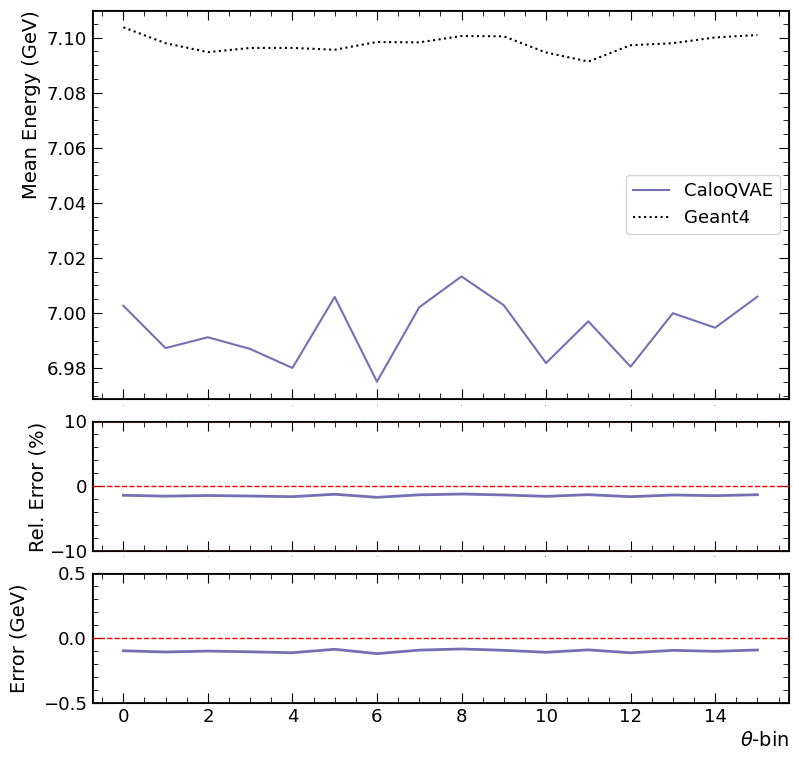

In [39]:
fig = plt.figure(figsize=(9, 9))
gs = gridspec.GridSpec(3, 1, height_ratios=[3,1,1]) 
gs.update(wspace=0.025, hspace=0.1)

ax0 = plt.subplot(gs[0])
plt.xticks(fontsize=0)
ax1 = plt.subplot(gs[1],sharex=ax0)
plt.xticks(fontsize=0)
ax2 = plt.subplot(gs[2],sharex=ax0)

plot_label = 'CaloQVAE'
atlas_label = 'Geant4'

ax0.plot(theta_avg_data,label=plot_label,linestyle='-',color='#7570b3')
ax0.plot(theta_avg_atlas_data,label=atlas_label,linestyle='dotted',color='black')

ratio = 100*np.divide(theta_avg_data-theta_avg_atlas_data,theta_avg_atlas_data)
ax1.plot(ratio,color='#7570b3',linewidth=2,linestyle='-')
ax2.plot(theta_avg_data-theta_avg_atlas_data,color='#7570b3',linewidth=2,linestyle='-')

ax0.set_xlabel("",fontsize=20)
ax0.set_ylabel("Mean Energy (GeV)", fontsize=14, loc="top")

ax0.xaxis.set_minor_locator(AutoMinorLocator())
ax0.yaxis.set_minor_locator(AutoMinorLocator())

ax0.tick_params(which='both', direction="in")
ax0.tick_params(which='major', length=7, direction="in")
ax0.tick_params(which='minor', length=4, direction="in")

ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
ax0.tick_params(axis="x",direction="in")
ax0.tick_params(axis="y",direction="in")

# Get the axis limits
x_min, x_max = ax0.get_xlim()
y_min, y_max = ax0.get_ylim()

# Create a rectangle patch for the outer line
outer_rectangle = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='black', facecolor='none')
ax0.add_patch(outer_rectangle)

ax0.legend(loc='best',fontsize=13,ncol=1)

ax1.set_ylabel('Rel. Error (%)', fontsize=14, labelpad=1)
plt.xlabel(r'$\theta$-bin', fontsize=14, loc='right')
ax1.axhline(y=0.0, color='r', linestyle='--',linewidth=1)
ax1.axhline(y=10, color='r', linestyle='--',linewidth=1)
ax1.axhline(y=-10, color='r', linestyle='--',linewidth=1)
ax1.set_ylim([-10,10])
plt.rc("font", size=13)

ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())

ax1.tick_params(which='both', direction="in")
ax1.tick_params(which='major', length=7, direction="in")
ax1.tick_params(which='minor', length=4, direction="in")

ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.tick_params(axis="x",direction="in")
ax1.tick_params(axis="y",direction="in")

# Get the axis limits
x_min, x_max = ax1.get_xlim()
y_min, y_max = ax1.get_ylim()

# Create a rectangle patch for the outer line
outer_rectangle = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='black', facecolor='none')
ax1.add_patch(outer_rectangle)

# Axis 2

ax2.set_ylabel('Error (GeV)', fontsize=14, labelpad=10)
ax2.axhline(y=0.0, color='r', linestyle='--',linewidth=1)
ax2.set_ylim([-0.5,0.5])

ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())

ax2.tick_params(which='both', direction="in")
ax2.tick_params(which='major', length=7, direction="in")
ax2.tick_params(which='minor', length=4, direction="in")

ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
ax2.tick_params(axis="x",direction="in")
ax2.tick_params(axis="y",direction="in")

# Get the axis limits
x_min, x_max = ax2.get_xlim()
y_min, y_max = ax2.get_ylim()

# Create a rectangle patch for the outer line
outer_rectangle = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='black', facecolor='none')
ax2.add_patch(outer_rectangle)

plt.savefig(f'/home/javier/Projects/CaloQVAE/figs/{modelname}/meanEnergyVstheta_{modelname}.png')

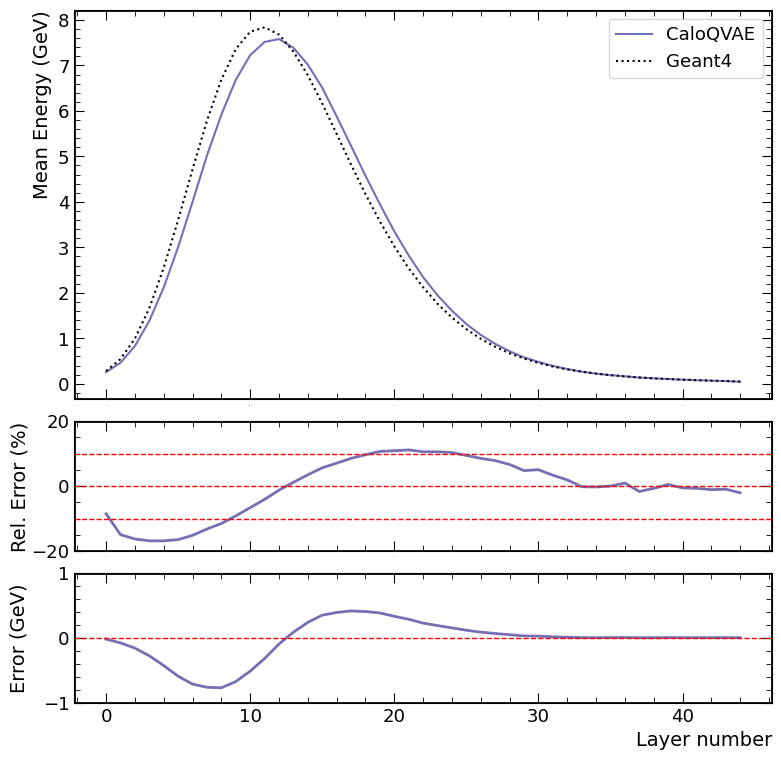

In [40]:
fig = plt.figure(figsize=(9, 9))
gs = gridspec.GridSpec(3, 1, height_ratios=[3,1,1]) 
gs.update(wspace=0.025, hspace=0.1)

ax0 = plt.subplot(gs[0])
plt.xticks(fontsize=0)
ax1 = plt.subplot(gs[1],sharex=ax0)
plt.xticks(fontsize=0)
ax2 = plt.subplot(gs[2],sharex=ax0)

plot_label = 'CaloQVAE'
atlas_label = 'Geant4'

ax0.plot(layer_avg_data,label=plot_label,linestyle='-',color='#7570b3')
ax0.plot(layer_avg_atlas_data,label=atlas_label,linestyle='dotted',color='black')

ratio = 100*np.divide(layer_avg_data-layer_avg_atlas_data,layer_avg_atlas_data)
ax1.plot(ratio,color='#7570b3',linewidth=2,linestyle='-')
ax2.plot(layer_avg_data-layer_avg_atlas_data,color='#7570b3',linewidth=2,linestyle='-')

ax0.set_xlabel("",fontsize=20)
ax0.set_ylabel("Mean Energy (GeV)", fontsize=14, loc="top")

ax0.xaxis.set_minor_locator(AutoMinorLocator())
ax0.yaxis.set_minor_locator(AutoMinorLocator())

ax0.tick_params(which='both', direction="in")
ax0.tick_params(which='major', length=7, direction="in")
ax0.tick_params(which='minor', length=4, direction="in")

ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
ax0.tick_params(axis="x",direction="in")
ax0.tick_params(axis="y",direction="in")

# Get the axis limits
x_min, x_max = ax0.get_xlim()
y_min, y_max = ax0.get_ylim()

# Create a rectangle patch for the outer line
outer_rectangle = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='black', facecolor='none')
ax0.add_patch(outer_rectangle)

ax0.legend(loc='best',fontsize=13,ncol=1)

ax1.set_ylabel('Rel. Error (%)', fontsize=14, labelpad=1)
plt.xlabel("Layer number", fontsize=14, loc='right')
ax1.axhline(y=0.0, color='r', linestyle='--',linewidth=1)
ax1.axhline(y=10, color='r', linestyle='--',linewidth=1)
ax1.axhline(y=-10, color='r', linestyle='--',linewidth=1)
ax1.set_ylim([-20,20])
plt.rc("font", size=13)

ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())

ax1.tick_params(which='both', direction="in")
ax1.tick_params(which='major', length=7, direction="in")
ax1.tick_params(which='minor', length=4, direction="in")

ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.tick_params(axis="x",direction="in")
ax1.tick_params(axis="y",direction="in")

# Get the axis limits
x_min, x_max = ax1.get_xlim()
y_min, y_max = ax1.get_ylim()

# Create a rectangle patch for the outer line
outer_rectangle = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='black', facecolor='none')
ax1.add_patch(outer_rectangle)

# Axis 2

ax2.set_ylabel('Error (GeV)', fontsize=14, labelpad=10)
ax2.axhline(y=0.0, color='r', linestyle='--',linewidth=1)
ax2.set_ylim([-1,1])

ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())

ax2.tick_params(which='both', direction="in")
ax2.tick_params(which='major', length=7, direction="in")
ax2.tick_params(which='minor', length=4, direction="in")

ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
ax2.tick_params(axis="x",direction="in")
ax2.tick_params(axis="y",direction="in")

# Get the axis limits
x_min, x_max = ax2.get_xlim()
y_min, y_max = ax2.get_ylim()

# Create a rectangle patch for the outer line
outer_rectangle = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='black', facecolor='none')
ax2.add_patch(outer_rectangle)

plt.savefig(f'/home/javier/Projects/CaloQVAE/figs/{modelname}/meanEnergyVsLayer_{modelname}.png')

In [36]:
###########
import torch

import hydra
from hydra.utils import instantiate
from hydra import initialize, compose

from utils.plotting.HighLevelFeatures import HighLevelFeatures as HLF



hydra.core.global_hydra.GlobalHydra.instance().clear()
initialize(version_base=None, config_path="../configs")


# config=compose(config_name="config.yaml")
config=compose(config_name="config.yaml")

HLF_1_photons = HLF('photon', filename=config.data.binning_xml_photons, wandb=False)
HLF_1_pions = HLF('pion', filename=config.data.binning_xml_pions, wandb=False)
HLF_1_electron = HLF('electron', filename=config.data.binning_xml_electrons, wandb=False)

/raid/javier/anaconda3/lib/python3.11/site-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'config.yaml': Defaults list is missing `_self_`. See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/default_composition_order for more information
  warnings.warn(msg, UserWarning)


In [122]:
atlas_energies = np.array(atlas_["incident_energies"])#/1000
data_energies = np.array(in_data['incidence energy'])#/1000 #loaded['energy']/1000 

entarget_samples = torch.tensor(atlas_energies)
entarget_samples_gen = torch.tensor(data_energies)

In [123]:
atlas_data = np.array(atlas_["showers"]) #[((low_cutoff < atlas_energies) & (atlas_energies < high_cutoff)).squeeze()]
data = np.array(in_data['showers'])

xtarget_samples = torch.tensor(atlas_data)
xgen_samples = torch.tensor(data)

In [124]:
xtarget_samples.shape

torch.Size([100000, 6480])

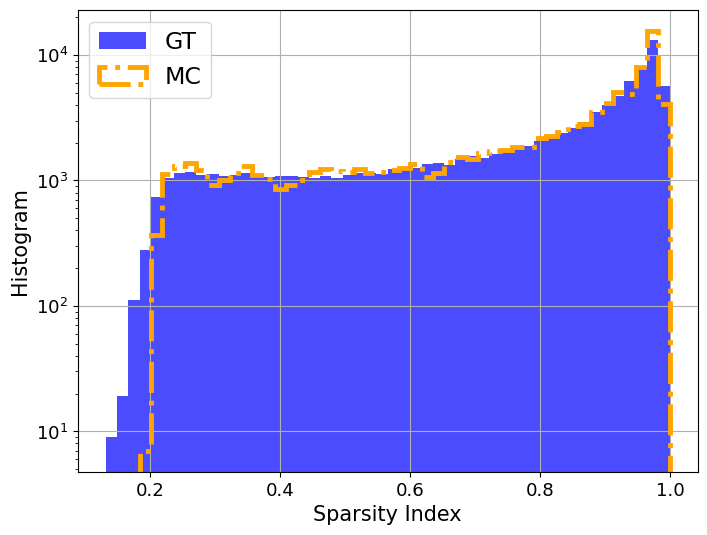

In [113]:
minVal, maxVal = min(((xtarget_samples == 0).sum(dim=1)/xtarget_samples.shape[1]).numpy()), max(((xtarget_samples == 0).sum(dim=1)/xtarget_samples.shape[1]).numpy())
binwidth = (maxVal-minVal)/50

plt.figure(figsize=(8,6))
plt.hist(((xtarget_samples == 0).sum(dim=1)/xtarget_samples.shape[1]).numpy(), bins=np.arange(minVal, maxVal + binwidth, binwidth), log=True, histtype='stepfilled', linewidth=2.5, color="b", alpha=0.7, label="GT")
# plt.hist(((xrecon_samples == 0).sum(dim=1)/xtarget_samples.shape[1]).numpy(), bins=np.arange(minVal, maxVal + binwidth, binwidth), log=True, histtype='step', linewidth=2.5, color="c", label="Recon")
plt.hist(((xgen_samples == 0).sum(dim=1)/xtarget_samples.shape[1]).numpy(), bins=np.arange(minVal, maxVal + binwidth, binwidth), log=True, histtype='step', linewidth=3.5, color="orange", linestyle="dashdot", label="MC")
# plt.hist(((xgen_samples_qpu == 0).sum(dim=1)/xtarget_samples.shape[1]).numpy(), bins=np.arange(minVal, maxVal + binwidth, binwidth), log=True, histtype='step', linewidth=3.5, color="brown", linestyle="dashed", label="QPU")
plt.xlabel("Sparsity Index", fontsize=15)
plt.ylabel("Histogram", fontsize=15)
# plt.legend(["GT", "Recon", "Samples", "Sample /w QPU"], fontsize=17)
plt.legend( fontsize=17)
# plt.title(f'{ds[part]}')
plt.grid("True")
plt.savefig(f'/home/javier/Projects/CaloQVAE/figs/{modelname}/sparsity_{modelname}_test.png')
plt.show()

<Figure size 800x600 with 0 Axes>

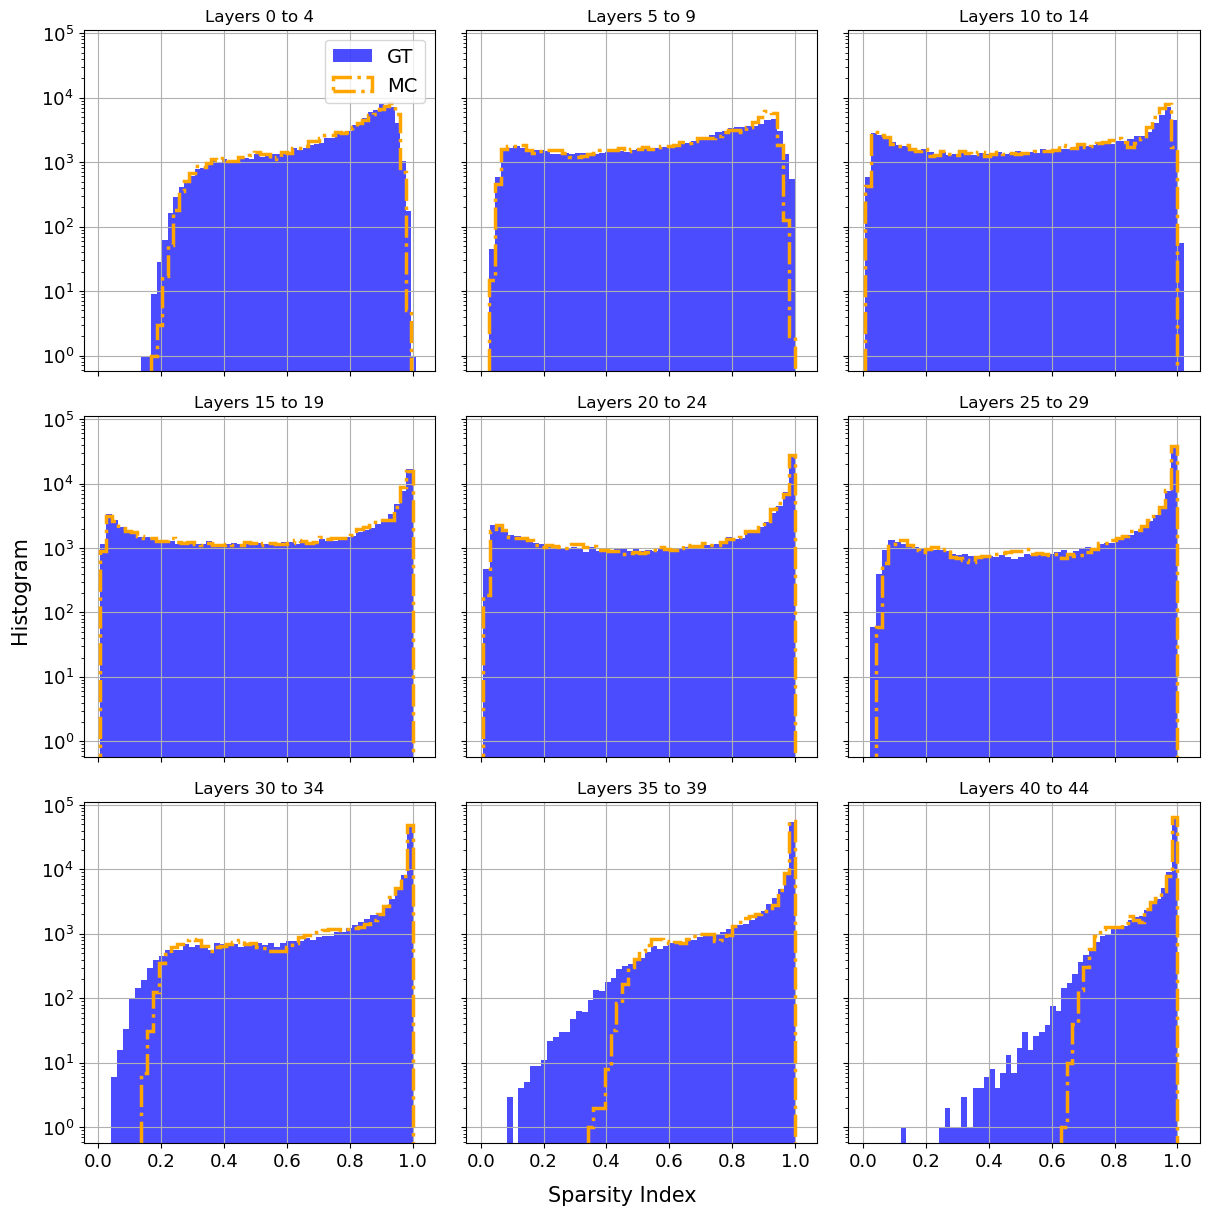

In [114]:
HLF_1_electron.relevantLayers = [0,5,10,15,20,25,30,35,40,45]
plt.figure(figsize=(8,6))
# Create a grid of subplots
fig, axes = plt.subplots(3,3, figsize=(12, 12), sharey=True, sharex=True, tight_layout=True)
fig.text(0.5, -0.01, 'Sparsity Index', ha='center', fontsize=15)
fig.text(-0.01, 0.5, 'Histogram', va='center', rotation='vertical', fontsize=15)

# Iterate through the columns of X and plot histograms
for i,_ in enumerate(HLF_1_electron.relevantLayers[:-1]):
    row_index = i // 3  # Determine the row index
    col_index = i % 3   # Determine the column index
    
    ax = axes[row_index, col_index]  # Get the current subplot
    
    # Plot histogram for the current column
    idx = HLF_1_electron.relevantLayers[i+1]*9*16
    idxPrev = (HLF_1_electron.relevantLayers[i])*9*16
    l = idx - idxPrev
    minVal, maxVal = min(((xtarget_samples[:, idxPrev:idx] == 0).sum(dim=1)/l).numpy()), max(((xtarget_samples[:, idxPrev:idx] == 0).sum(dim=1)/l).numpy())
    binwidth = (maxVal-minVal)/50
    ax.hist(((xtarget_samples[:, idxPrev:idx] == 0).sum(dim=1)/l).numpy(),  bins=np.arange(minVal, maxVal + binwidth, binwidth), log=True, histtype='stepfilled', linewidth=2.5, color="b", alpha=0.7, label="GT")
    # ax.hist(((xrecon_samples[:, idxPrev:idx] == 0).sum(dim=1)/l).numpy(), bins=np.arange(minVal, maxVal + binwidth, binwidth), log=True, histtype='step', linewidth=2.5, color="c", label="Recon")
    ax.hist(((xgen_samples[:, idxPrev:idx] == 0).sum(dim=1)/l).numpy(), bins=np.arange(minVal, maxVal + binwidth, binwidth), log=True, histtype='step', linewidth=2.5, color="orange", linestyle="dashdot", label="MC")
    # ax.hist(((xgen_samples_qpu[:, idxPrev:idx] == 0).sum(dim=1)/l).numpy(), bins=np.arange(minVal, maxVal + binwidth, binwidth), log=True, histtype='step', linewidth=2.5, color="m", linestyle="dashed", label="QPU")
    if i == 0:
        # ax.legend(["GT", "Recon", "Sample", "Sample w/ QPU"], fontsize=14)
        ax.legend(fontsize=14)
    ax.grid("True")
    
    # Set labels and title for the subplot
    # ax.set_xlabel(f'Column {i + 1}')
    # ax.set_ylabel('Frequency')
    ax.set_title(f'Layers {HLF_1_electron.relevantLayers[i]} to {HLF_1_electron.relevantLayers[i+1]-1}', fontsize=12)

# Adjust layout and display the plots
plt.tight_layout()
plt.savefig(f'/home/javier/Projects/CaloQVAE/figs/{modelname}/sparsity_per_layer_{modelname}_test.png')
plt.show()


In [115]:
E_right = 200000
E_left = 1000
tmp = (entarget_samples < E_right) * (entarget_samples > E_left)
idxEnFilter = (tmp == True).nonzero(as_tuple=True)[0]

tmp_gen = (entarget_samples_gen < E_right) * (entarget_samples_gen > E_left)
idxEnFilter_gen = (tmp_gen == True).nonzero(as_tuple=True)[0]

len(idxEnFilter)

76586

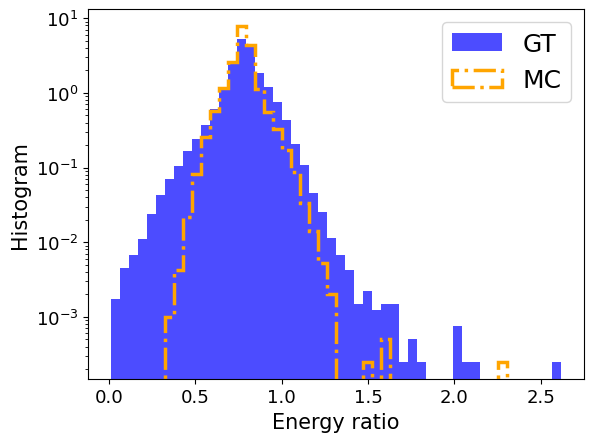

In [116]:
minVal, maxVal = min((xtarget_samples[idxEnFilter,:].sum(dim=1)/entarget_samples[idxEnFilter].view(-1)).numpy()), max((xtarget_samples[idxEnFilter,:].sum(dim=1)/entarget_samples[idxEnFilter].view(-1)).numpy())
binwidth = (maxVal-minVal)/50
plt.hist((xtarget_samples[idxEnFilter,:].sum(dim=1)/entarget_samples[idxEnFilter].view(-1)).numpy(), bins=np.arange(minVal, maxVal + binwidth, binwidth), log=True, histtype='stepfilled', linewidth=2.5, color="b", alpha=0.7, density=True, label="GT")
plt.hist((xgen_samples[idxEnFilter_gen,:].sum(dim=1).numpy()/entarget_samples_gen[idxEnFilter_gen].view(-1)).numpy(), bins=np.arange(minVal, maxVal + binwidth, binwidth), log=True, histtype='step', linewidth=2.5, color="orange", linestyle="dashdot", density=True, label="MC")
# plt.hist((xgen_samples_qpu[idxEnFilter,:].sum(dim=1)/entarget_samples[idxEnFilter].view(-1)).numpy(), bins=np.arange(minVal, maxVal + binwidth, binwidth), log=True, histtype='step', linewidth=2.5, color="m", linestyle="dashed", density=True, label="QPU")

# minVal, maxVal = min((xtarget_samples.sum(dim=1)/entarget_samples.view(-1)).numpy()), max((xtarget_samples.sum(dim=1)/entarget_samples.view(-1)).numpy())
# binwidth = (maxVal-minVal)/50
# plt.hist((xtarget_samples.sum(dim=1)/entarget_samples.view(-1)).numpy(), bins=np.arange(minVal, maxVal + binwidth, binwidth), log=True, histtype='stepfilled', linewidth=2.5, color="b", alpha=0.7, density=True, label="GT")
# plt.hist((xgen_samples.sum(dim=1).numpy()/entarget_samples_gen.view(-1)).numpy(), bins=np.arange(minVal, maxVal + binwidth, binwidth), log=True, histtype='step', linewidth=2.5, color="orange", linestyle="dashdot", density=True, label="MC")

plt.xlabel("Energy ratio", fontsize=15)

plt.ylabel("Histogram", fontsize=15)
plt.legend(fontsize=18)
plt.savefig(f'/home/javier/Projects/CaloQVAE/figs/{modelname}/energy_ratio_{modelname}_test.png')
plt.show()


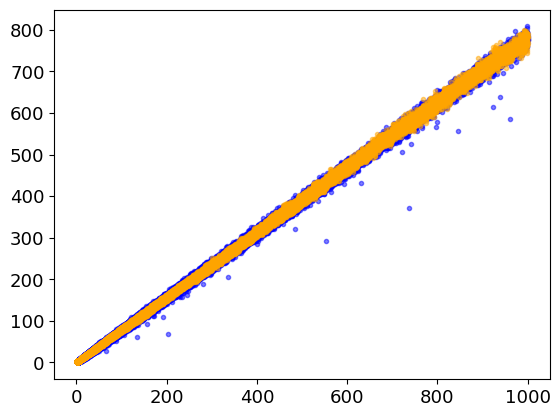

In [117]:
plt.scatter(entarget_samples.numpy()/1000, xtarget_samples.sum(dim=1).numpy()/1000, marker='.', alpha=.5, color="b")
plt.scatter(entarget_samples_gen.numpy()/1000, xgen_samples.sum(dim=1).numpy()/1000, marker='.', alpha=.5, color="orange")

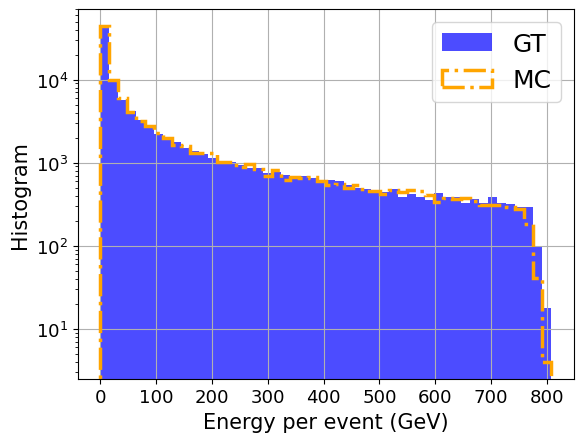

torch.Size([100000, 6480])


In [125]:
minVal, maxVal = min(xtarget_samples.sum(dim=1).numpy()/1000), max(xtarget_samples.sum(dim=1).numpy()/1000)
binwidth = (maxVal-minVal)/50
plt.hist(xtarget_samples.sum(dim=1).numpy()/1000, bins=np.arange(minVal, maxVal + binwidth, binwidth), log=True, histtype='stepfilled', linewidth=2.5, color="b", alpha=0.7, label="GT")
plt.hist(xgen_samples.sum(dim=1).numpy()/1000, bins=np.arange(minVal, maxVal + binwidth, binwidth), log=True, histtype='step', alpha=1.0, linewidth=2.5, color="orange", linestyle="dashdot", label="MC")
plt.xlabel("Energy per event (GeV)", fontsize=15)

plt.ylabel("Histogram", fontsize=15)
plt.legend( fontsize=18)
plt.grid("True")
plt.savefig(f'/home/javier/Projects/CaloQVAE/figs/{modelname}/energy_{modelname}_test.png')
plt.show()
print(xgen_samples.shape)

<Figure size 800x600 with 0 Axes>

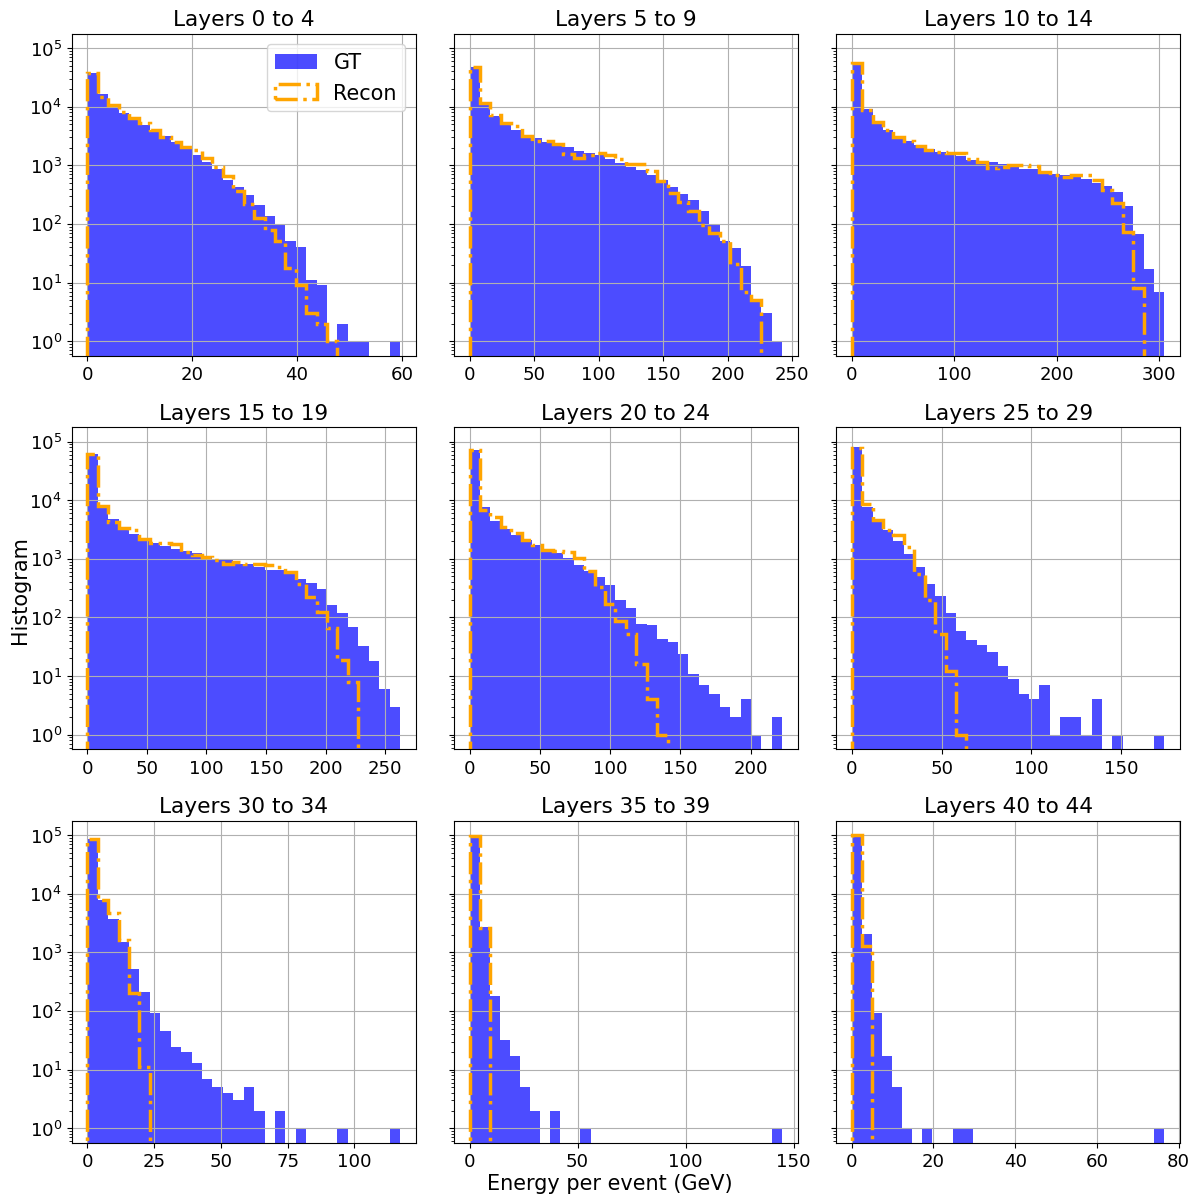

In [126]:
HLF_1_electron.relevantLayers = [0,5,10,15,20,25,30,35,40,45]
plt.figure(figsize=(8,6))
# Create a grid of subplots
fig, axes = plt.subplots(3,3, figsize=(12, 12), sharey=True, sharex=False, tight_layout=True)
fig.text(0.5, 0.0, 'Energy per event (GeV)', ha='center', fontsize=15)
fig.text(0.0, 0.5, 'Histogram', va='center', rotation='vertical', fontsize=15)

# Iterate through the columns of X and plot histograms
for i,_ in enumerate(HLF_1_electron.relevantLayers[:-1]):
    row_index = i // 3  # Determine the row index
    col_index = i % 3   # Determine the column index
    
    ax = axes[row_index, col_index]  # Get the current subplot
    
    # Plot histogram for the current column
    idx = HLF_1_electron.relevantLayers[i+1]*9*16
    idxPrev = (HLF_1_electron.relevantLayers[i])*9*16
    l = idx - idxPrev
    minVal, maxVal = min(xtarget_samples[:, idxPrev:idx].sum(dim=1).numpy()/1000), max(xtarget_samples[:, idxPrev:idx].sum(dim=1).numpy()/1000)
    binwidth = (maxVal-minVal)/30
    ax.hist(xtarget_samples[:, idxPrev:idx].sum(dim=1).numpy()/1000,  bins=np.arange(minVal, maxVal + binwidth, binwidth), density=False, log=True, histtype='stepfilled', linewidth=2.5, color="b", alpha=0.7)
    # ax.hist(xrecon_samples[:, idxPrev:idx].sum(dim=1).numpy()/1000, bins=np.arange(minVal, maxVal + binwidth, binwidth), density=False, log=True, histtype='step', linewidth=2.5, color="c")
    # ax.hist(xrecon_samples_2[:, idxPrev:idx].sum(dim=1).numpy()/1000, bins=20, log=True, histtype='step', linewidth=2.5, color="m", linestyle="dashdot")
    ax.hist(xgen_samples[:, idxPrev:idx].sum(dim=1).numpy()/1000, bins=np.arange(minVal, maxVal + binwidth, binwidth), density=False, log=True, histtype='step', linewidth=2.5, color="orange", linestyle="dashdot")
    # ax.hist(xgen_samples_qpu[:, idxPrev:idx].sum(dim=1).numpy()/1000, bins=np.arange(minVal, maxVal + binwidth, binwidth), log=True, histtype='step', linewidth=2.5, color="m", linestyle="dashed")
    if i == 0:
        # ax.legend(["GT", "Recon", "Sample", "Sample w/ QPU"], title=f'{ds[part]}')
        ax.legend(["GT", "Recon", "Sample", "Sample w/ QPU"], fontsize=15)
    ax.grid("True")
    
    # Set labels and title for the subplot
    # ax.set_xlabel(f'Column {i + 1}')
    # ax.set_ylabel('Frequency')
    ax.set_title(f'Layers {HLF_1_electron.relevantLayers[i]} to {HLF_1_electron.relevantLayers[i+1]-1}')

# Adjust layout and display the plots
plt.tight_layout()
plt.savefig(f'/home/javier/Projects/CaloQVAE/figs/{modelname}/energy_per_layer_{modelname}_test.png')
plt.show()


In [168]:
#JSD
# data.sum(1)
# atlas_data.sum(1)

from scipy.stats import entropy
from numpy.linalg import norm
import numpy as np

def JSD(P, Q):
    _P = P / norm(P, ord=1)
    _Q = Q / norm(Q, ord=1)
    _M = 0.5 * (_P + _Q)
    return 0.5 * (entropy(_P, _M) + entropy(_Q, _M))

def bin_data(atlas_data, data, bins=100):
    # bins = 100
    if atlas_data.sum(1).min() < data.sum(1).min() :
        amin = atlas_data.sum(1).min()
    else:
        amin = data.sum(1).min()

    if atlas_data.sum(1).max() < data.sum(1).max() :
        amax = data.sum(1).max()
    else:
        amax = atlas_data.sum(1).max()
    p = np.histogram(data.sum(1), bins, range=(amin,amax))[0]/100000
    q = np.histogram(atlas_data.sum(1), bins, range=(amin,amax))[0]/100000
    return q,p

In [178]:
jsd_list = []
for b in range(1000,200000,5000):
    q,p = bin_data(atlas_data, data, bins=b)
    jsd_list.append(JSD(q,p))

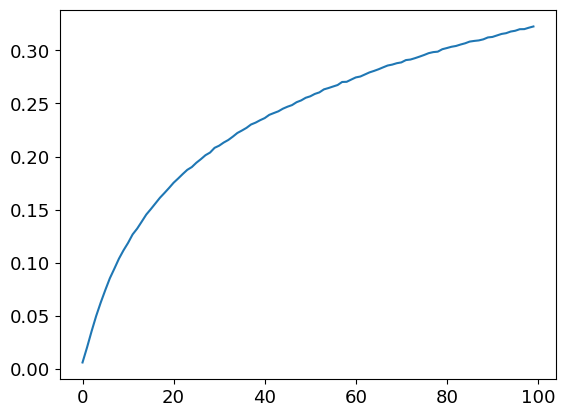

In [181]:
plt.plot(jsd_list)

In [175]:
q,p = bin_data(atlas_data, data, bins=50000)
JSD(q,p)

0.1178401867445305

In [180]:
for b in range(200000,500000,5000):
    q,p = bin_data(atlas_data, data, bins=b)
    jsd_list.append(JSD(q,p))

In [184]:
q1 = np.percentile(atlas_data.sum(1), 25)
q3 = np.percentile(atlas_data.sum(1), 75)
iqr = q3 - q1
print(iqr)

135755.62799044032


In [187]:
# ℎ=2×IQR×𝑛−1/3
h = 2 * iqr * 100000**(-1/3)

In [188]:
(atlas_data.sum(1).max() - atlas_data.sum(1).min())/h

138.09954477473931

In [189]:
q,p = bin_data(atlas_data, data, bins=139)
JSD(q,p)

0.0007290298218439855